In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, xlab, ylab, scale_color_discrete, facet_wrap, theme_minimal, element_text, theme
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text, geom_line, scale_x_continuous, ggtitle, xlab
import ast

In [2]:
def print_mlp_dataset(dataset_name):
    acc_rate_csv_path = '../acc_rate_csvs/' + dataset_name + '_cv.csv'

    # raw_df
    raw_df = pd.read_csv(acc_rate_csv_path)

    for n_layer in [1, 2, 3, 4]:
        for n_features in [1, 2, 4, 117]:
            df_fold = raw_df
            df_fold_compare = df_fold[df_fold['n_layer'] == n_layer]
            df_fold_compare = df_fold_compare[df_fold_compare['n_features'] == n_features]
            df_fold_compare = df_fold_compare[['fold', 'layer_size', 'val_acc']]
            df_fold_compare['fold'] = df_fold_compare['fold'].apply(lambda x: f'fold{x}.test')

            plot = (
                ggplot(df_fold_compare, aes(x=pd.Categorical(df_fold_compare['layer_size']), y='val_acc')) +
                geom_line(aes(group=1)) +
                labs(title="dataset: " + dataset_name + " --- " + str(n_layer) + " hidden layer --- " + str(n_features) + " features",
                    x="hidden layer size",
                    y="acc percentage") +
                theme_minimal() + 
                facet_wrap('~fold', ncol=3) + 
                theme(plot_title=element_text(size=10))
            )
            print(plot)

In [3]:
# print_mlp_dataset('detailed')

In [4]:
# print_mlp_dataset('systematic')

In [5]:
# print_mlp_dataset('epigenomic')

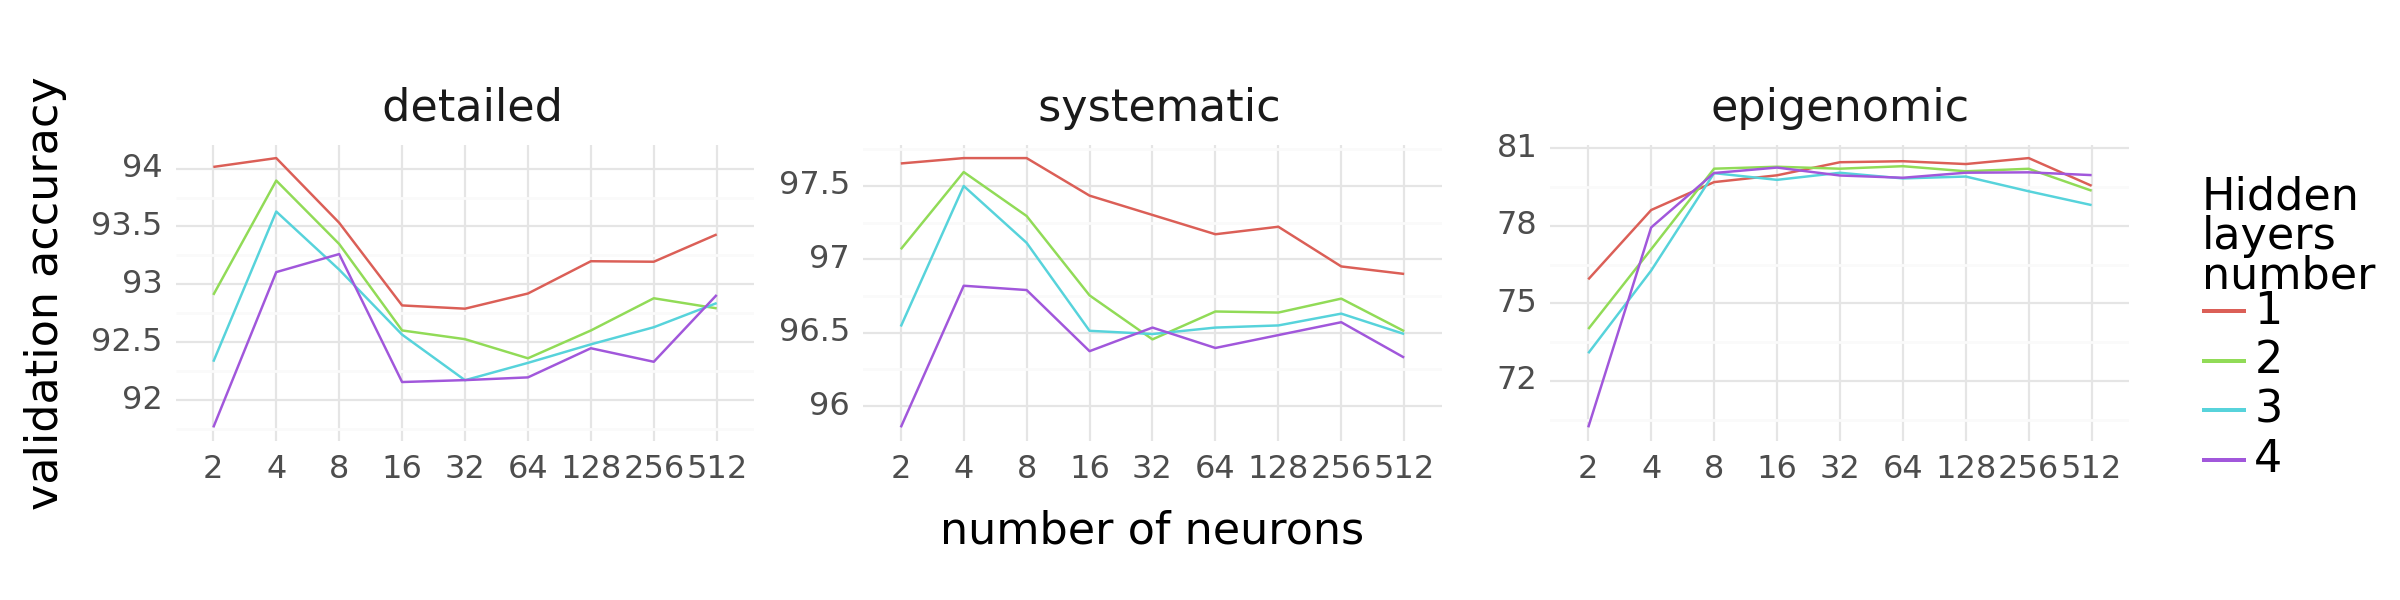

<Figure Size: (1200 x 300)>

In [9]:
detailed_df   = pd.read_csv('../acc_rate_csvs/detailed_cv.csv')
epigenomic_df = pd.read_csv('../acc_rate_csvs/epigenomic_cv.csv')
systematic_df = pd.read_csv('../acc_rate_csvs/systematic_cv.csv')

detailed_df = detailed_df.groupby(['n_layer', 'layer_size'])['val_acc'].mean().reset_index()
epigenomic_df = epigenomic_df.groupby(['n_layer', 'layer_size'])['val_acc'].mean().reset_index()
systematic_df = systematic_df.groupby(['n_layer', 'layer_size'])['val_acc'].mean().reset_index()

detailed_df['dataset'] = ' detailed'
epigenomic_df['dataset'] = 'epigenomic'
systematic_df['dataset'] = ' systematic'

final_df = pd.concat([detailed_df, epigenomic_df, systematic_df])
final_df['layer_size'] = pd.Categorical(final_df['layer_size'], ordered=True)

# Plotting
plot_combined = (
    ggplot(final_df, aes(x='layer_size', y='val_acc', color='factor(n_layer)')) + 
    geom_line() +
    aes(group='factor(n_layer)') +
    xlab("number of neurons") +
    ylab("validation accuracy") +
    scale_color_discrete(name="Hidden\nlayers\nnumber\n") +
    facet_wrap('~dataset', ncol=3, scales='free_y') +
    theme_minimal() +
    theme(  figure_size=(12, 3),
            text=element_text(size=16),
            axis_text=element_text(size=11.5),
            axis_title=element_text(size=16),
            legend_title=element_text(size=16),
            legend_text=element_text(size=16)
))

plot_combined

In [7]:
plot_combined.save('mlp.pdf')
plot_combined.save('mlp.jpg')

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 12 x 3 in image.
C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: mlp.pdf
C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 12 x 3 in image.
C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: mlp.jpg
